In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Preparing Titanic Dataset

In [3]:
import numpy as np
import pandas as pd
def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
url = "https://www.openml.org/data/get_csv/16826755/phpMYEkMl"
data = pd.read_csv(url)
data = data.replace('?', np.nan)
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.to_csv('titanic.csv', index=False)

In [4]:
data_titanic = pd.read_csv('titanic.csv')

## Identifying numerical and categorical variables

In [5]:
data_titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [6]:
data_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


- **In many datasets, integer variables are cast as float. So, after inspecting
the data type of the variable, even if you get float as output, go ahead
and check the unique values to make sure that those variables are discrete
and not continuous.**

In [7]:
data_titanic['sibsp'].unique()  # Discrete Variable stored as Continuous

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

- Now, let's inspect the first 20 distinct values of the continuous variable fare:


In [8]:
data_titanic['fare'].unique()[:20]   # This was done bcoz data has common fares

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    ,  25.925 ,
       247.5208,  76.2917,  75.2417,  52.5542, 221.7792,  26.    ,
        91.0792, 135.6333])

In [9]:
data_titanic['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [10]:
data_titanic['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


- To understand whether a variable is continuous or discrete, we can also make a histogram:


- _The embarked variable contains strings as values, which means it's
categorical, whereas cabin contains a mix of letters and numbers, which
means it can be classified as a mixed type of variable._

<AxesSubplot: >

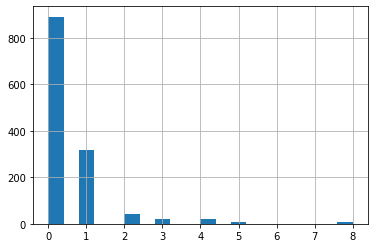

In [11]:
data['sibsp'].hist(bins=20)   # binsize= (max-min)/bins
# This is a discrete histogram, bcoz the variable has discrete values
# Insight: More than 800 people came alone on the ship
# Family People were less, maybe bcoz they did not consider titanic as safe or maybe it was too
# expensive

<AxesSubplot: >

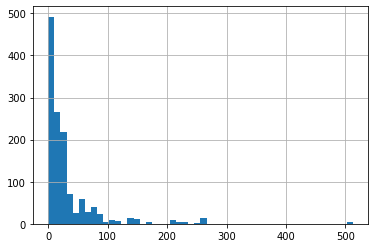

In [12]:
data_titanic['fare'].hist(bins=50)

In [13]:
# Insight: Fares of msot were less than 30 dollars. So, it was expensive. That's why many people 
# boarded the ship alone
data_titanic[data_titanic['fare'] < 30].count()
# Out of 1309 entries, 958 had a fare less than 30 dollars
# With 512 dollars as the max fare and 33 dollars as the average fare

pclass       958
survived     958
name         958
sex          958
age          734
sibsp        958
parch        958
ticket       958
fare         958
cabin         77
embarked     958
boat         284
body          90
home.dest    451
dtype: int64

## Quantifying missing data


In [14]:
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT',
'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']

In [15]:
data_cup = pd.read_csv('cup98LRN.txt', usecols=cols)

In [16]:
data_cup.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [17]:
# Number of missing values in each variable
data_cup.isnull().sum()

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
dtype: int64

In [18]:
data_cup.shape

(95412, 11)

In [19]:
# Quantifying the percentage of missing values in each variable
data_cup.isnull().mean()*100

AGE         24.802960
NUMCHLD     87.018404
INCOME      22.309563
WEALTH1     46.882992
MBCRAFT     55.395548
MBGARDEN    55.395548
MBBOOKS     55.395548
MBCOLECT    55.458433
MAGFAML     55.395548
MAGFEM      55.395548
MAGMALE     55.395548
dtype: float64

Text(0.5, 1.0, 'Graph showing percentage of missing values of different variables')

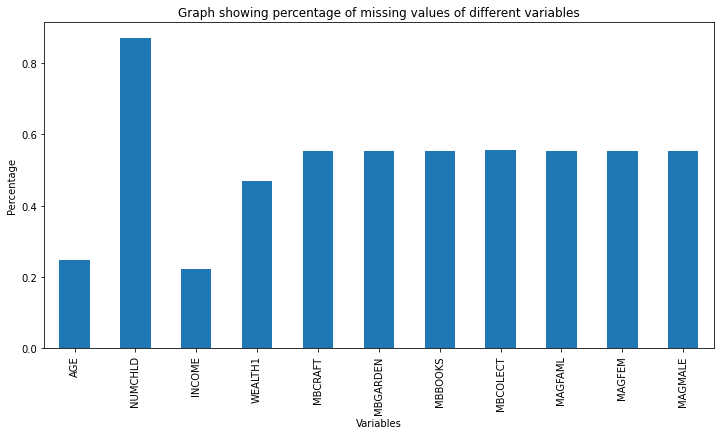

In [20]:
# Barplot with percentage of missing values for each variable.
# Barplot becoz variables are considered under categories.
data_cup.isnull().mean().plot.bar(figsize=(12,6))
plt.xlabel("Variables")
plt.ylabel("Percentage")
plt.title("Graph showing percentage of missing values of different variables")

## Determining cardinality in categorical variables


- _The number of unique categories in a variable is called cardinality. For example, the
cardinality of the Gender variable, which takes values of female and male, is 2, whereas
the cardinality of the Civil status variable, which takes values of married, divorced,
singled, and widowed, is 4._

In [21]:
cols_1 = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
data = pd.read_csv('cup98LRN.txt', usecols=cols_1)

In [22]:
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,,X


In [23]:
# Let's replace empty strings with NaN values
data.replace(' ', np.nan, inplace=True)

In [24]:
data.nunique()

DOMAIN      16
GENDER       6
RFA_2       14
RFA_15      33
MDMAUD_A     5
dtype: int64

In [25]:
data.nunique(dropna=False, axis=0)

DOMAIN      17
GENDER       7
RFA_2       14
RFA_15      34
MDMAUD_A     5
dtype: int64

In [26]:
data['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

- **pandas nunique() can be used in the entire dataframe. pandas
unique(), on the other hand, works only on a pandas Series. Thus, we
need to specify the column name that we want to return the unique values
for.**

Text(0.5, 1.0, 'Cardinality of Variables')

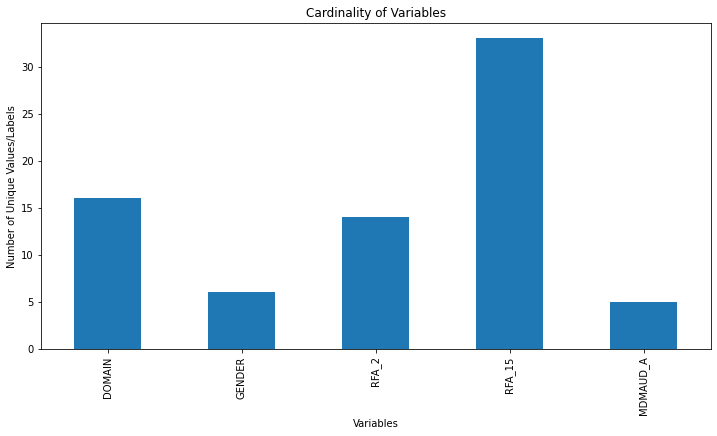

In [27]:
data.nunique().plot.bar(figsize=(12,6))
plt.xlabel("Variables")
plt.ylabel('Number of Unique Values/Labels')
plt.title('Cardinality of Variables')

_**We can also evaluate the cardinality of a subset of the variables in a dataset by slicing the dataframe:**_


In [28]:
data[['RFA_2', 'MDMAUD_A', 'RFA_2']].nunique()

RFA_2       14
MDMAUD_A     5
RFA_2       14
dtype: int64

## Pinpointing rare categories in categorical variables

Different labels appear in a variable with different frequencies. Some categories of a
variable appear a lot, that is, they are very common among the observations, whereas other
categories appear only in a few observations. In fact, categorical variables often contain a
few dominant labels that account for the majority of the observations and a large number of
labels that appear only seldom. Categories that appear in a tiny proportion of the
observations are rare. Typically, we consider a label to be rare when it appears in less than
`5%` or `1%` of the population.

In [29]:
data_car = pd.read_csv('car.data', header=None)  # First row is considered as header

In [30]:
data_car.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [31]:
data_car.dtypes   # Doors & Persons have numerical values, still object

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [32]:
data_car.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

In [33]:
data_car.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [34]:
data_car.persons.unique()

array(['2', '4', 'more'], dtype=object)

In [35]:
data_car['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [36]:
car_ratioByClass = (data_car['class'].value_counts()/len(data_car))*100

In [37]:
car_ratioByClass

unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: class, dtype: float64

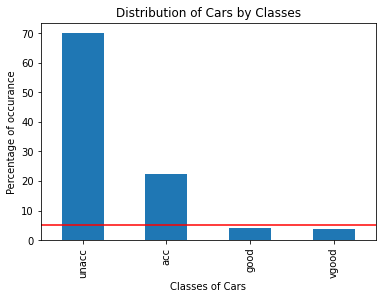

In [38]:
fig = car_ratioByClass.plot.bar()
fig.axhline(y=5, color='red')
fig.set_xlabel('Classes of Cars')
fig.set_ylabel('Percentage of occurance')
fig.set_title("Distribution of Cars by Classes")
plt.show()

## Identifying a linear relationship


Linear models assume that the independent variables, X, take a linear relationship with the
dependent variable, Y. This relationship can be dictated by the following equation:
                            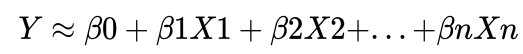
> Error = Target - Predictions

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
# Creating a Toy Dataset
np.random.seed(29)       # seed makes the random module to generate same numbers everytime
x = np.random.randn(200)

In [41]:
y = x*10 + np.random.randn(200)*2

In [42]:
data_toy = pd.DataFrame([x,y]).T

In [43]:
data_toy.columns = ['x', 'y']

In [44]:
data_toy.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


C:\Users\pc\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='x', ylabel='y'>

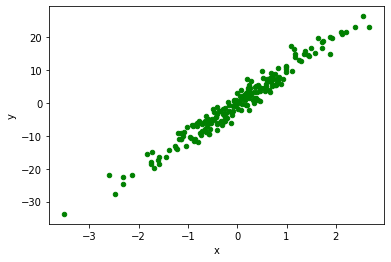

In [45]:
data_toy.plot.scatter('x', 'y', c='green')

Text(0.5, 1.0, 'Regression Plot showing Linear Relationship bw Independent & Dependent Variable')

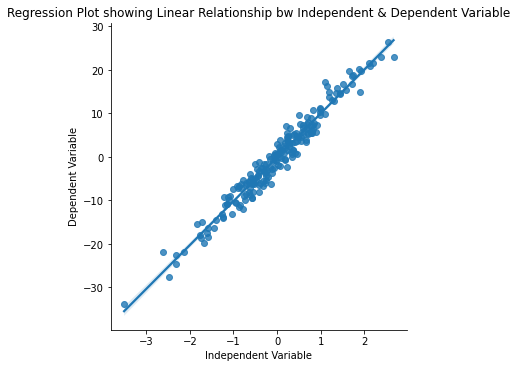

In [46]:
# Plots the Scatter & Regression Plot
sns.lmplot(data=data_toy, x='x', y='y', order=1) # order=1 means linear reg, 2 or more means poly reg
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Regression Plot showing Linear Relationship bw Independent & Dependent Variable')

In [47]:
# Building the Model
linreg = LinearRegression()
linreg.fit(data_toy['x'].to_frame(), data_toy['y'])

LinearRegression()

- **Scikit-learn predictor classes do not take pandas Series as arguments.
Because data['x'] is a pandas Series, we need to convert it into a
dataframe using to_frame().**


In [48]:
# Making Predictions
predictions = linreg.predict(data_toy['x'].to_frame())

In [49]:
# Calculating Residuals
residuals = data_toy['y'] - predictions

Text(0.5, 1.0, 'Scatter Plot of x & Residuals')

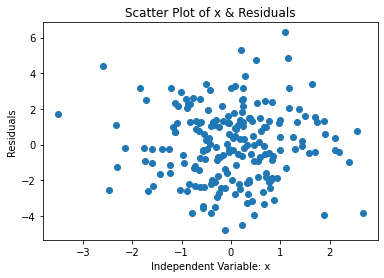

In [50]:
# Making a scatter plot of Independent Variable x and the residuals
plt.scatter(x=data_toy['x'], y=residuals)
plt.xlabel('Independent Variable: x')
plt.ylabel('Residuals')
plt.title('Scatter Plot of x & Residuals')

Text(0.5, 1.0, 'Histogram of Residuals')

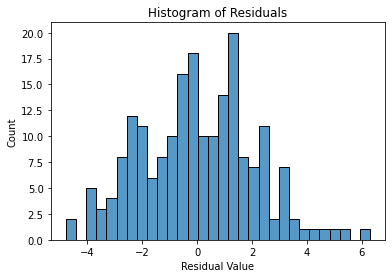

In [51]:
# plt.hist(residuals, bins=20)  # Not that much aesthetic
sns.histplot(residuals, bins=30)
plt.xlabel('Residual Value')
plt.title('Histogram of Residuals')

<AxesSubplot: xlabel='y', ylabel='Density'>

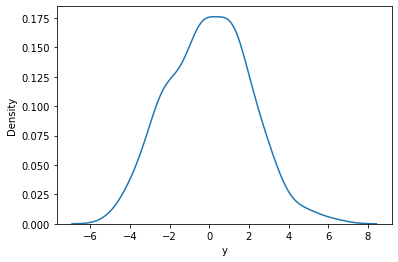

In [52]:
sns.kdeplot(residuals)

## Identifying a normal distribution


*Linear models assume that the independent variables are normally distributed. Failure to meet this assumption may produce algorithms that perform poorly. We can determine whether a variable is normally distributed with histograms and Q-Q plots. If the variable is normally distributed, the dots in the Q-Q plot should fall along a 45 degree diagonal.*

In [53]:
import scipy.stats as stats

In [54]:
# Again creating a toy dataframe
np.random.seed(29)
x = np.random.randn(200)

In [55]:
data_norm = pd.DataFrame([x]).T

In [56]:
data_norm.columns = ['x']

In [57]:
data_norm.head()

,x
0,-0.417482
1,0.706032
2,1.915985
3,-2.141755
4,0.719057


<ipython-input-58-90e23a147566>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_norm['x'], bins=40)


<AxesSubplot: xlabel='x', ylabel='Density'>

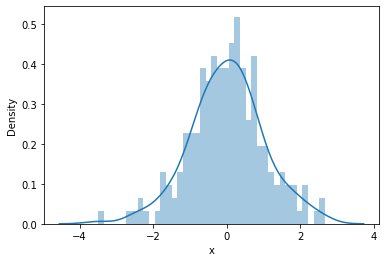

In [58]:
sns.distplot(data_norm['x'], bins=40)

<AxesSubplot: >

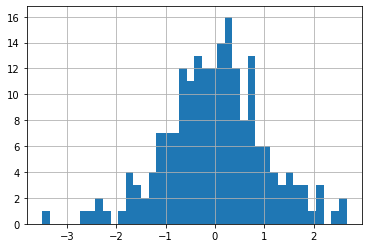

In [59]:
data_norm['x'].hist(bins=40)

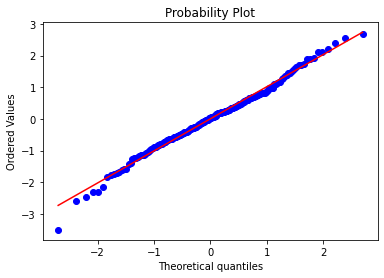

In [60]:
# Creating and displaying a Q-Q plot to assess a normal distribution:
stats.probplot(data_norm['x'], dist='norm', plot=plt)
plt.show()

#### Since the variable is normally distributed, its values follow the theoretical quantiles and thus lie along the 45-degree diagonal.

Quartiles are a type of quantile. A q-quantile divides the data into q-parts
Types of Quantiles:
- Quartiles (4 Quantiles): 3 Quartiles divide the data into 4 parts
- Deciles (10 Quantiles): 9 deciles divide the data into 10 parts
- Percentiles (100 Quantiles): 99 percentiles divide the data into 100 parts.
> **There is always one quantile less than the parts they create**

## Distinguishing variable distribution

A probability distribution is a function that describes the likelihood of obtaining the
possible values of a variable. There are many well-described variable distributions, such as
the normal, binomial, or Poisson distributions. Some machine learning algorithms assume
that the independent variables are normally distributed. Other models make no
assumptions about the distribution of the variables, but a better spread of these values may
improve their performance

In [61]:
from sklearn.datasets import load_boston

In [62]:
data_boston = load_boston()

In [63]:
boston = pd.DataFrame(data_boston.data,
                      columns=data_boston.feature_names)

In [64]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


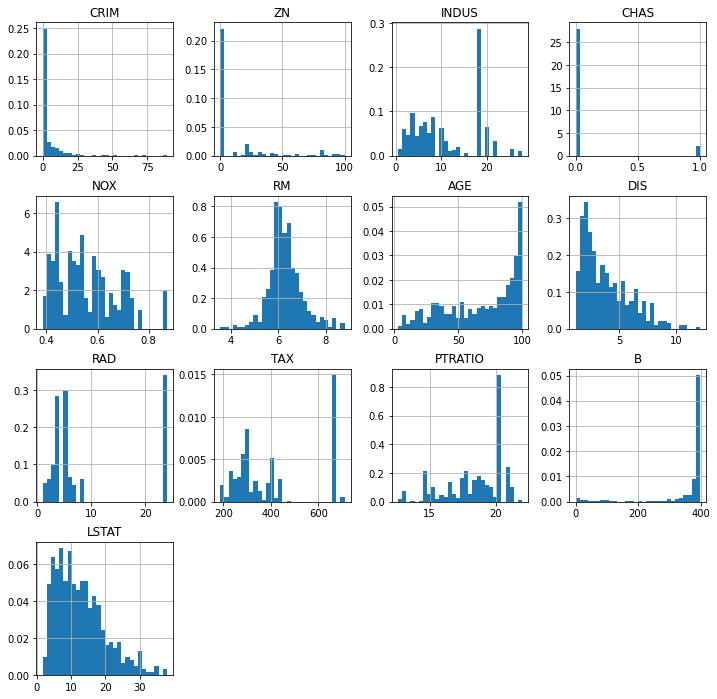

In [65]:
boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()   # Most of the variables in the dataset are skewed

## Highlighting outliers

An outlier is a data point that is significantly different from the remaining data. On
occasions, outliers are very informative; for example, when looking for credit card
transactions, an outlier may be an indication of fraud. In other cases, outliers are rare
observations that do not add any additional information. These cases may also affect the
performance of some machine learning models.

*An outlier is an observation which deviates so much from the other observations as to
arouse suspicions that it was generated by a different mechanism.*

In [66]:
#boston = pd.DataFrame(data_boston.data,
 #                     columns=data_boston.feature_names)[['RM', 'LSTAT', 'CRIM']]

Text(0.5, 1.0, 'Boxplot')

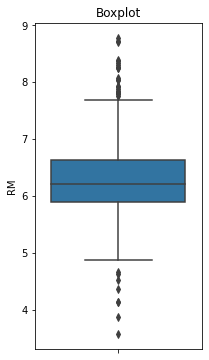

In [67]:
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

In [68]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [69]:
upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [70]:
outliers = np.where(boston['RM']>upper_boundary, True, np.where(boston['RM']<lower_boundary, True, False))

In [71]:
outliers_df = boston.loc[outliers, 'RM'] # loc[] method from pandas to capture only those
# values in the RM variable that were outliers in a new dataframe.

In [72]:
outliers_df

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
180    7.765
186    7.831
195    7.875
203    7.853
204    8.034
224    8.266
225    8.725
226    8.040
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
280    7.820
283    7.923
364    8.780
365    3.561
367    3.863
374    4.138
384    4.368
386    4.652
406    4.138
412    4.628
414    4.519
Name: RM, dtype: float64

In [73]:
# Removing Outliers
boston.loc[~outliers, 'RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 476, dtype: float64

## Comparing feature magnitude


Many machine learning algorithms are sensitive to the scale of the features. For example,
the coefficients of linear models are directly informed by the scale of the feature. In
addition, features with bigger value ranges tend to dominate over features with smaller
ranges. Having features within a similar scale also helps algorithms converge faster, thus
improving performance and training times

In [75]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [77]:
data_range = boston.max() - boston.min()

In [78]:
data_range

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
dtype: float64